# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import sys
sys.path.append('./')

from src.visualization import (
    plot_data,
)

SEED = 42

np.random.seed(SEED)

# Read dataset

In [2]:
df =  pd.read_csv("/Users/dkunc/Downloads/drug_consumption.data", sep=",", header=None)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Adding columns names based on dataset description provided on http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29?fbclid=IwAR1fZcLEoj1YHI8OOin0Xovnnp3OLhZIGN9e4VcxCFD5bgOBEaqgHyGos8c#

In [3]:
columns = ["ID"]
features = ["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore",  "Escore", "Oscore",
           "Ascore", "Cscore", "Impulsive", "SS"]
drugs = ["Alcohol", "Amphetamine", "AmylNitrite", "Benzodiazepine", "Caffeine", "Cannabis",
                  "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "LegalHighs", "LSD", 
                  "Methadone", "Mushrooms", "Nicotine", "Semeron", "VSA"]
columns.extend(features)
columns.extend(drugs)

df.columns = columns
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Save dataset with columns names to `.csv` 

In [4]:
df.reset_index(drop=True).to_csv("drug_consumption.csv", index=False)

In [5]:
df = pd.read_csv("drug_consumption.csv")

In [6]:
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


# Dataset description

This dataset is quantified dataset of drug consumption (http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29?fbclid=IwAR1fZcLEoj1YHI8OOin0Xovnnp3OLhZIGN9e4VcxCFD5bgOBEaqgHyGos8c#).

It contains 1885 instances with 32 attributes.

Attributes can be divided into features and drug usages. 

Features contain 12 quantified values for following properties:
- Age of participant - 6 values (18-24, 25-34, 35-44, 45-54, 55-64, 65+)
- Gender of participant - 2 values (Male, Female)
- Level of Education - 9 values (Left school before 16 years, Left school at 16 years,  Left school at 17 years, Left school at 18 years, Some college or university, no certificate or degree, Professional certificate/ diploma, University degre, Masters degree, Doctorate degree)
- Country of current residence of participant - 7 values (Australia, Canada, New Zealand, Other, Republic of Ireland, UK, USA)
- Ethnicity of participant - 7 values (Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, Other, White)
- Nscore - NEO-FFI-R Neuroticism
- Escore - NEO-FFI-R Extraversion
- Oscore - NEO-FFI-R Openness to experience  
- Ascore - NEO-FFI-R Agreeableness
- Cscore - NEO-FFI-R Conscientiousness
- Impulsive - impulsiveness measured by BIS-11
- SS - sensation seeing measured by ImpSS

Drug usages attributes contain information about usage of specific drug. Each participant could assign 1 from 7 values:
- CL0 - Never Used 
- CL1 - Used over a Decade Ago
- CL2 - Used in Last Decade
- CL3 - Used in Last Year 
- CL4 - Used in Last Month 
- CL5 - Used in Last Week
- CL6 - Used in Last Day 

Dataset contains 19 drugs:
- Alcohol
- Amphetamine
- AmylNitrite
- Benzodiazepine
- Caffeine
- Cannabis
- Chocolate
- Cocaine
- Crack
- Ecstasy
- Heroin
- Ketamine
- LegalHighs
- LSD 
- Methadone
- Mushrooms
- Nicotine
- Semeron
- VSA

## Description of features

In [7]:
df[features].describe(include='all')

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## Desrciption of drugs consumption classes

In [8]:
df[drugs].describe(include='all')

,Alcohol,Amphetamine,AmylNitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,CL5,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,759,976,1305,1000,1385,463,807,1038,1627,1021,1605,1490,1094,1069,1429,982,610,1877,1455


#### As we can see we don't have strange values in our quantified dataset, so there is no need to delete any datapoints.

### To decide with which drugs we will be working, let's find out what are classes distributions for each drug.

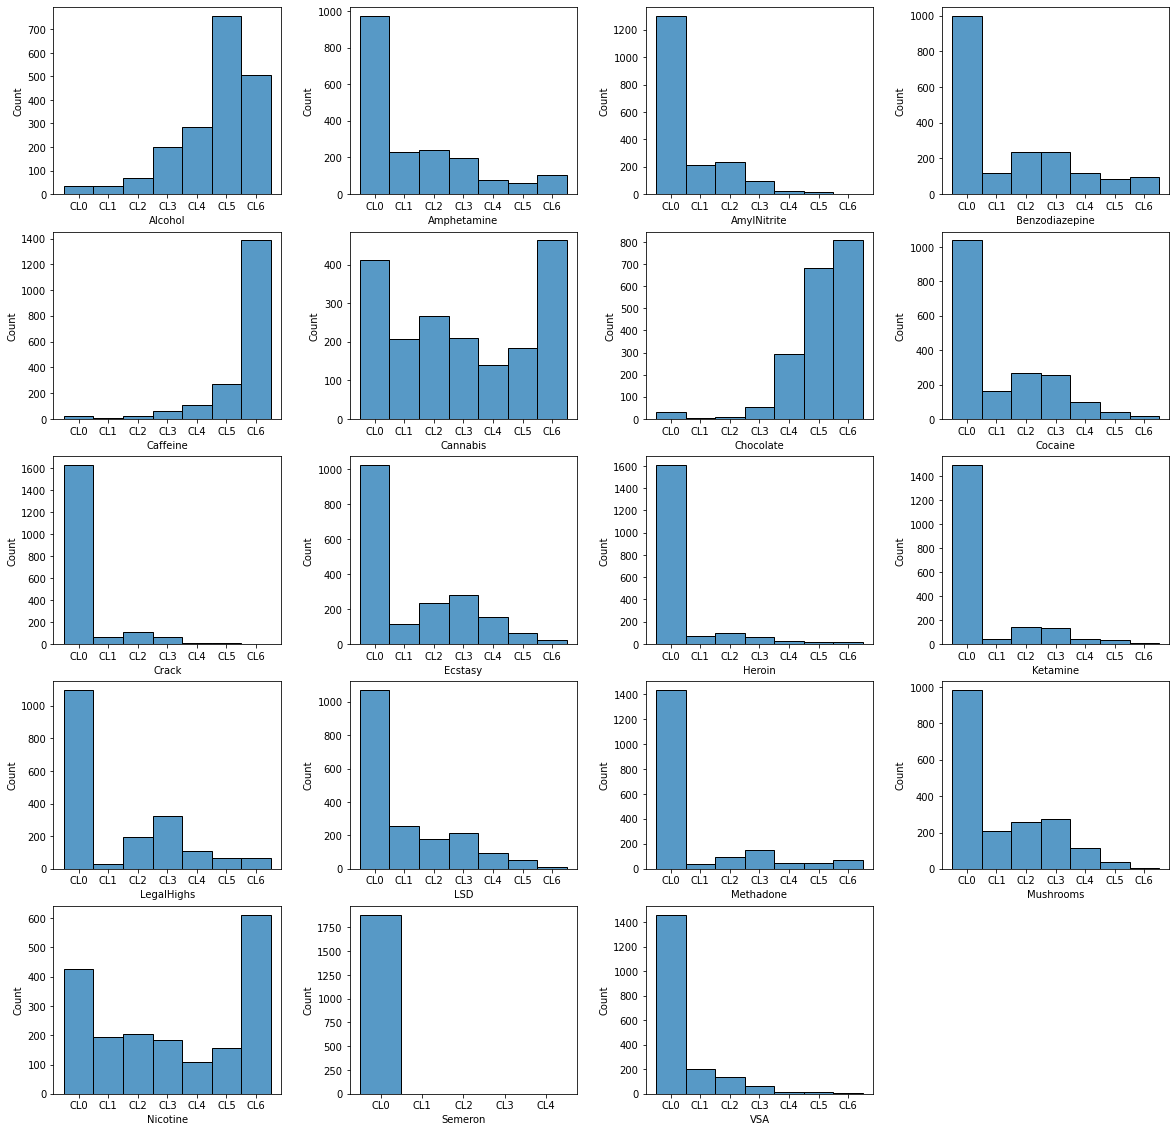

In [9]:
fig = plt.figure(figsize=[20,20])
fig.subplots_adjust(hspace=0.2, wspace=0.3)

i = 1
for drug in drugs:
    ax = fig.add_subplot(5, 4, i)
    i += 1
    sns.histplot(df.sort_values([drug]).reset_index(drop=True), x=drug, label=drug, ax=ax)
    
plt.show()



As we can see there are two drugs that are "close" to be balanced - `Cannabis` and `Nicotine`. But also there is tendention visible - more values on edges - never used and used in last day. Intermediate classes are underrepresented, so maybe aggregating classes to more general gropus can be good idea.

Other drugs are skewed - mostly to "Never used" side, only `Caffeine` and `Chocolate` are skewed to "Used in Last Day" side. It may be caused by legality - `Caffeine` and `Chocolate` are popular, legal and mostly concerned as not drugs.

In `Alcohol` we can kind of Normal Distribution trend.

We can remove `Semeron` from our dataset, because only 8 datapoints have value different than CL0.

In [10]:
drugs.remove("Semeron")
df = df.drop(["Semeron"], axis=1)

## Let's see how classes distribution will look like if we change amount of classes. 

### We will reduce amount of classes to 3:
- CL0 - Never used - merged CL0 and CL1
- CL3 - used in LastDecade -  merged CL2 and CL3
- CL6 - used in LastMonth - merged CL4, CL5 and CL6

In [11]:
drugs

['Alcohol',
 'Amphetamine',
 'AmylNitrite',
 'Benzodiazepine',
 'Caffeine',
 'Cannabis',
 'Chocolate',
 'Cocaine',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalHighs',
 'LSD',
 'Methadone',
 'Mushrooms',
 'Nicotine',
 'VSA']

In [12]:
new_columns = []


for drug in drugs:
    print(drug)
    conditions = [
        (df[drug] == 'CL0') | (df[drug] == 'CL1'),
        (df[drug] == 'CL2') | (df[drug] == 'CL3'),
        (df[drug] == 'CL4') | (df[drug] == 'CL5') | (df[drug] == 'CL6') ]
    choices = ['CL0', 'CL3', 'CL6']
    df[drug+'_3_classes'] = np.select(conditions, choices, default='')
    new_columns.append(drug+'_3_classes')

df

Alcohol
Amphetamine
AmylNitrite
Benzodiazepine
Caffeine
Cannabis
Chocolate
Cocaine
Crack
Ecstasy
Heroin
Ketamine
LegalHighs
LSD
Methadone
Mushrooms
Nicotine
VSA


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack_3_classes,Ecstasy_3_classes,Heroin_3_classes,Ketamine_3_classes,LegalHighs_3_classes,LSD_3_classes,Methadone_3_classes,Mushrooms_3_classes,Nicotine_3_classes,VSA_3_classes
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL3,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL0,CL6,CL0,CL3,CL0,CL3,CL3,CL0,CL6,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL0,CL3,CL0,CL0,CL0,CL0,CL3,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL6
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL0,CL3,CL0,CL0,CL3,CL6,CL6,CL6,CL6,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL0,CL6,CL0,CL3,CL0,CL3,CL0,CL3,CL6,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0


## Description of new classes 

In [13]:
df[new_columns].describe(include='all')

,Alcohol_3_classes,Amphetamine_3_classes,AmylNitrite_3_classes,Benzodiazepine_3_classes,Caffeine_3_classes,Cannabis_3_classes,Chocolate_3_classes,Cocaine_3_classes,Crack_3_classes,Ecstasy_3_classes,Heroin_3_classes,Ketamine_3_classes,LegalHighs_3_classes,LSD_3_classes,Methadone_3_classes,Mushrooms_3_classes,Nicotine_3_classes,VSA_3_classes
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,CL6,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
freq,1551,1206,1515,1116,1764,788,1786,1198,1694,1134,1673,1535,1123,1328,1468,1191,875,1655


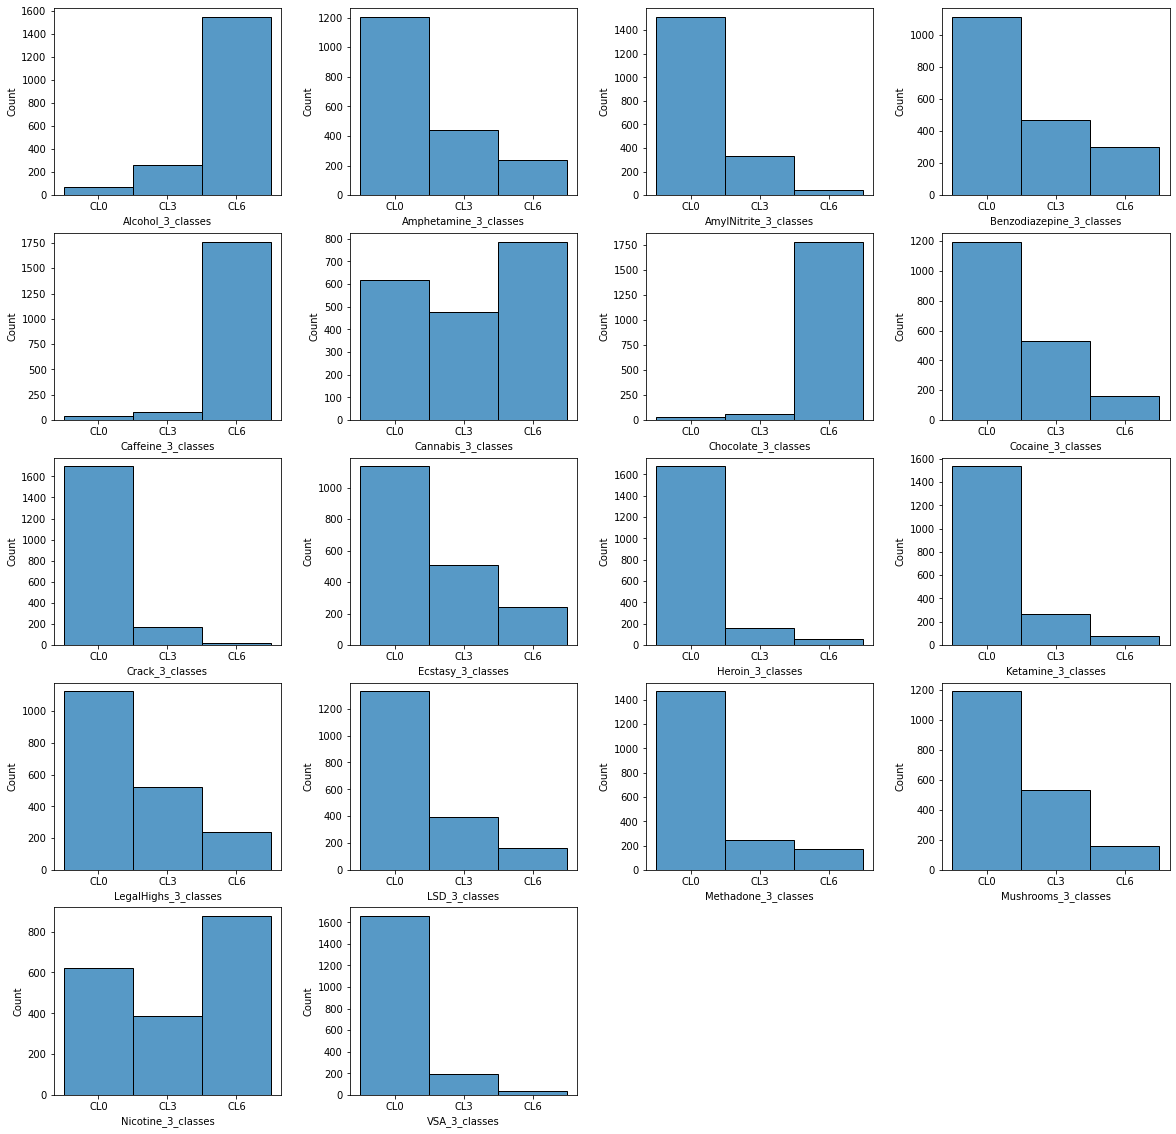

In [14]:
fig = plt.figure(figsize=[20,20])
fig.subplots_adjust(hspace=0.2, wspace=0.3)

i = 1
for drug in new_columns:
    ax = fig.add_subplot(5, 4, i)
    i += 1
    sns.histplot(df.sort_values([drug]).reset_index(drop=True), x=drug, label=drug, ax=ax)
    
plt.show()




As we can see in this case also Cannabis and Nicotine are close to be balanced, differences in instances of diggerent classes amount are not significant.

Due to this conclusions we will work with those two drugs.

# Train and test split

Now we are going to perfom train and test split. We will decide what operations on data should be done based on training set, and then every operation will be performed on test set. 

We will use `train_test_split` method from `sklearn`. The split will be stratified by 

## Cannabis

In [15]:
cannabis_data = df.drop(columns=["Cannabis"], axis=1)
cannabis_data = cannabis_data.drop(columns=new_columns, axis=1)
cannabis_data = cannabis_data.drop(columns=["ID"], axis=1)

# change categorical columns to numeric
for drug in drugs:
    if drug != "Cannabis":
        le = LabelEncoder()
        cannabis_data[drug] = le.fit_transform(cannabis_data[drug])


cannabis_data["Cannabis"] = df["Cannabis_3_classes"]
train_data_cannabis, test_data_cannabis = train_test_split(
    cannabis_data,
    test_size=0.3,
    stratify=cannabis_data['Cannabis'],
    random_state=42,
)

In [16]:
cannabis_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,CL6
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,CL3
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,CL3


In [17]:
train_data_cannabis.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis
1629,0.49788,-0.48246,-0.05921,0.24923,-0.31685,1.60383,0.16767,-0.45174,-0.01729,1.81175,...,0,0,0,0,1,0,1,1,0,CL6
456,-0.95197,0.48246,0.45468,0.96082,-0.31685,0.62967,0.00332,0.14143,0.59042,0.12331,...,4,0,4,4,3,0,3,6,0,CL6
1538,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-1.55078,1.28610,-0.97631,0.43852,0.93949,...,0,0,0,4,3,0,4,6,0,CL6
1451,-0.07854,0.48246,1.98437,0.96082,-0.31685,-0.46725,0.00332,-0.17779,0.76096,0.75830,...,0,0,0,0,0,1,0,0,0,CL0
605,-0.95197,-0.48246,0.45468,0.96082,-0.31685,-0.46725,0.00332,-1.11902,1.45039,-0.78155,...,0,0,0,0,0,0,0,3,0,CL6


In [18]:
test_data_cannabis.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis
38,1.09449,-0.48246,0.45468,0.96082,-0.31685,-1.55078,1.28610,0.29338,-0.01729,0.75830,...,0,0,0,0,0,0,1,1,0,CL0
1048,-0.07854,-0.48246,1.98437,-0.28519,-0.31685,-1.55078,-0.15487,0.72330,-1.92595,0.25953,...,5,0,0,0,0,2,0,1,1,CL6
153,-0.07854,-0.48246,0.45468,0.96082,-0.31685,-0.67825,0.96248,-1.68062,0.76096,0.75830,...,0,0,0,0,0,0,0,1,0,CL0
72,1.09449,-0.48246,-1.22751,0.96082,-0.31685,-1.55078,0.96248,-0.01928,0.43852,0.93949,...,0,0,0,0,0,0,0,2,0,CL0
1119,-0.07854,-0.48246,-0.61113,-0.57009,-0.31685,-0.34799,-2.44904,-1.27553,-0.76096,-0.27607,...,0,3,2,2,2,6,2,1,0,CL3


# Pair plot of dependencies between classes

In [19]:
features_with_cannabis = ["Cannabis"]
features_with_cannabis.extend(features)
features_with_cannabis

['Cannabis',
 'Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS']

In [20]:
#sns.pairplot(train_data_cannabis[features_with_cannabis], hue = 'Cannabis')

In [21]:
#sns.pairplot(train_data_cannabis[drugs], hue = 'Cannabis')

In [22]:
correlation = train_data_cannabis.apply(lambda x : pd.factorize(x)[0]).corr("spearman")
correlation

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis
Age,1.000000,0.058521,0.036748,-0.108106,-0.035937,-0.019869,-0.031264,-0.046940,-0.054346,-0.110191,...,-0.152091,0.010837,-0.064978,-0.169002,-0.031735,-0.056161,0.052663,-0.103311,-0.097188,0.111694
Gender,0.058521,1.000000,-0.052804,-0.234912,-0.001352,0.000480,-0.023192,-0.000484,-0.097948,-0.083907,...,-0.172374,-0.115221,-0.192363,-0.318693,-0.025774,-0.177711,0.082855,0.031179,-0.141694,0.227983
Education,0.036748,-0.052804,1.000000,0.069456,-0.004714,0.019338,0.052444,-0.000639,0.010739,0.046689,...,0.005498,0.033212,-0.015417,0.045276,0.022853,0.048505,-0.046256,-0.037531,0.065903,-0.067407
Country,-0.108106,-0.234912,0.069456,1.000000,0.024071,0.022725,0.083790,0.034827,0.047837,0.077515,...,0.225457,0.197238,0.088181,0.360210,0.066395,0.321694,-0.090575,0.043641,0.240578,-0.341286
Ethnicity,-0.035937,-0.001352,-0.004714,0.024071,1.000000,-0.009588,0.011334,-0.030294,0.013779,-0.010748,...,-0.074257,-0.013146,-0.024641,-0.037507,0.003297,-0.059482,0.020437,0.031952,0.017188,-0.039374
Nscore,-0.019869,0.000480,0.019338,0.022725,-0.009588,1.000000,0.102064,0.057423,0.055977,0.124692,...,0.047336,0.080759,-0.025737,0.054909,0.019009,0.042200,0.014726,0.045435,0.051688,0.001902
Escore,-0.031264,-0.023192,0.052444,0.083790,0.011334,0.102064,1.000000,0.087974,0.056858,0.082084,...,0.095300,0.063363,0.079050,0.054587,0.011185,0.111798,-0.004165,-0.016074,0.064313,-0.030091
Oscore,-0.046940,-0.000484,-0.000639,0.034827,-0.030294,0.057423,0.087974,1.000000,0.056474,0.050502,...,0.034793,0.032977,-0.010906,0.038702,0.000875,0.047343,-0.012127,-0.005073,-0.001804,-0.090052
Ascore,-0.054346,-0.097948,0.010739,0.047837,0.013779,0.055977,0.056858,0.056474,1.000000,0.054099,...,0.046078,0.073840,0.098842,0.102031,0.018489,0.045597,-0.049558,-0.014936,0.043086,-0.077029
Cscore,-0.110191,-0.083907,0.046689,0.077515,-0.010748,0.124692,0.082084,0.050502,0.054099,1.000000,...,0.094637,0.057990,0.054240,0.118883,0.050186,0.087272,-0.000967,0.028139,0.090871,-0.049791


<AxesSubplot:>

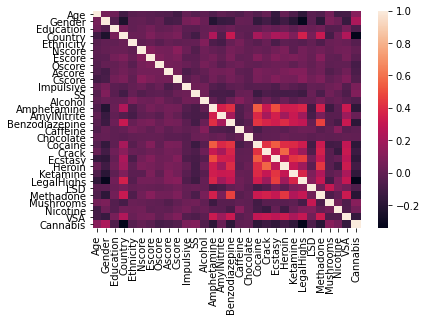

In [23]:
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns,
    yticklabels=correlation.columns
)

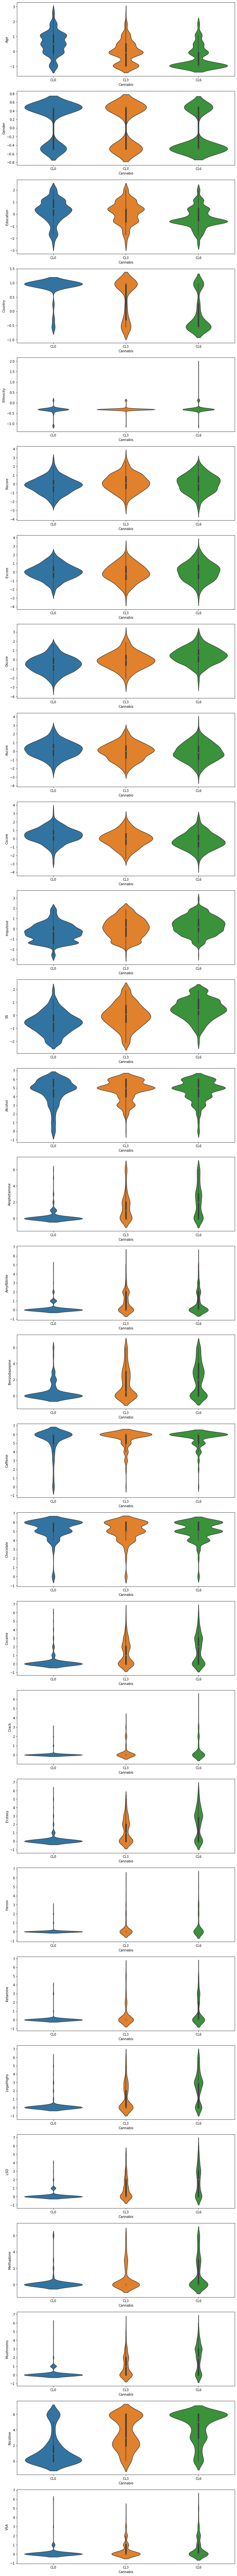

In [24]:
fig = plt.figure(figsize=(12,5* (len(features)+len(drugs) - 1)))
fig.subplots_adjust(hspace=0.2, wspace=0.3)

i = 1
for feature in features:

    ax = fig.add_subplot((len(features)+len(drugs) - 1), 1, i)
    i += 1
    sns.violinplot(x="Cannabis", y=feature, data=train_data_cannabis.sort_values(["Cannabis"]))

for drug in drugs:
    if drug != "Cannabis":
        ax = fig.add_subplot((len(features)+len(drugs) - 1), 1, i)
        i += 1
        sns.violinplot(x="Cannabis", y=drug, data=train_data_cannabis.sort_values(["Cannabis"]))

plt.show()

# Data standarization

In [25]:
scaler = StandardScaler().fit(train_data_cannabis.drop(["Cannabis"], axis=1))

In [26]:
train_data_cannabis_scaled = pd.DataFrame(scaler.transform(train_data_cannabis.drop(["Cannabis"], axis=1)))
train_data_cannabis_scaled["Cannabis"] = train_data_cannabis["Cannabis"].reset_index(drop=True)
train_data_cannabis_scaled.columns = train_data_cannabis.columns
train_data_cannabis_scaled["Usage"] = ["Train"] * len(train_data_cannabis_scaled)

In [27]:
train_data_cannabis_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis,Usage
0,0.575229,-1.008375,-0.040815,-0.133812,-0.028025,1.604740,0.170502,-0.443475,-0.022977,1.840530,...,-0.348902,-0.458072,-0.762277,-0.045469,-0.500533,-0.114168,-0.932115,-0.453264,CL6,Train
1,-1.095874,0.991695,0.501118,0.875286,-0.028025,0.627661,0.006291,0.149157,0.585562,0.146790,...,-0.348902,2.755739,1.465853,1.272636,-0.500533,1.242477,1.144675,-0.453264,CL6,Train
2,-1.095874,-1.008375,-0.622853,-1.295680,-0.028025,-1.559321,1.287991,-0.967570,0.433455,0.965532,...,-0.348902,-0.458072,1.465853,1.272636,-0.500533,1.920799,1.144675,-0.453264,CL6,Train
3,-0.089155,0.991695,2.114284,0.875286,-0.028025,-0.472545,0.006291,-0.169774,0.756334,0.783773,...,-0.348902,-0.458072,-0.762277,-0.704521,0.110766,-0.792490,-1.347473,-0.453264,CL0,Train
4,-1.095874,-1.008375,0.501118,0.875286,-0.028025,-0.472545,0.006291,-1.110150,1.446705,-0.760910,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.792490,-0.101399,-0.453264,CL6,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,-1.095874,0.991695,-0.622853,-1.295680,-0.028025,1.841517,-2.205857,0.730499,-0.767661,-0.994591,...,-0.348902,-0.458072,-0.762277,1.931688,1.333365,1.242477,-0.101399,-0.453264,CL6,Train
1315,-1.095874,0.991695,1.248777,0.875286,-0.028025,0.627661,1.455960,-0.169774,2.460315,-0.506012,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.792490,-1.347473,-0.453264,CL0,Train
1316,-1.095874,-1.008375,-0.622853,0.875286,-0.028025,0.733758,-1.629052,0.890145,-1.219446,-1.623067,...,-0.348902,1.952286,0.908820,1.931688,-0.500533,1.920799,1.144675,-0.453264,CL3,Train
1317,-1.095874,-1.008375,-0.622853,-1.295680,-0.028025,-0.153161,1.742419,1.069272,0.282559,-0.994591,...,1.596985,1.952286,1.465853,3.249793,1.333365,2.599122,1.144675,1.580256,CL6,Train


In [28]:
test_data_cannabis_scaled = pd.DataFrame(scaler.transform(test_data_cannabis.drop(["Cannabis"], axis=1)))
test_data_cannabis_scaled["Cannabis"] = test_data_cannabis["Cannabis"].reset_index(drop=True)
test_data_cannabis_scaled.columns = test_data_cannabis.columns
test_data_cannabis_scaled["Usage"] = ["Test"] * len(test_data_cannabis_scaled)

In [29]:
test_data_cannabis_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis,Usage
0,1.262883,-1.008375,0.501118,0.875286,-0.028025,-1.559321,1.287991,0.300969,-0.022977,0.783773,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.114168,-0.932115,-0.453264,CL0,Test
1,-0.089155,-1.008375,2.114284,-0.891667,-0.028025,-1.559321,-0.151766,0.730499,-1.934239,0.283438,...,-0.348902,-0.458072,-0.762277,-0.704521,0.722065,-0.792490,-0.932115,0.563496,CL6,Test
2,-0.089155,-1.008375,0.501118,0.875286,-0.028025,-0.684177,0.964644,-1.671241,0.756334,0.783773,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.792490,-0.932115,-0.453264,CL0,Test
3,1.262883,-1.008375,-1.272869,0.875286,-0.028025,-1.559321,0.964644,-0.011407,0.433455,0.965532,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.792490,-0.516757,-0.453264,CL0,Test
4,-0.089155,-1.008375,-0.622853,-1.295680,-0.028025,-0.352928,-2.444006,-1.266518,-0.767661,-0.253843,...,2.569928,1.148834,0.351788,0.613583,3.167263,0.564154,-0.932115,-0.453264,CL3,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.095874,-1.008375,-0.622853,-0.133812,-0.028025,-1.447276,1.116096,0.590636,-0.612820,-0.760910,...,-0.348902,-0.458072,1.465853,-0.704521,-0.500533,1.920799,-0.516757,-0.453264,CL6,Test
562,2.101564,-1.008375,-0.622853,-1.295680,-0.028025,-1.700593,-1.227760,-0.838697,-1.487231,-0.383991,...,-0.348902,-0.458072,-0.762277,-0.045469,-0.500533,-0.114168,1.144675,0.563496,CL3,Test
563,-0.089155,-1.008375,-0.622853,-1.295680,-0.028025,-0.153161,0.478743,0.730499,-0.612820,0.283438,...,-0.348902,1.148834,2.579918,0.613583,-0.500533,0.564154,1.144675,-0.453264,CL6,Test
564,-1.095874,-1.008375,0.501118,-1.295680,-0.028025,0.220706,-1.227760,0.300969,-0.459491,-1.118358,...,5.488759,-0.458072,0.908820,1.272636,-0.500533,1.242477,1.144675,2.597016,CL6,Test


In [30]:
data_cannabis_scaled = train_data_cannabis_scaled.append(test_data_cannabis_scaled)
data_cannabis_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,Nicotine,VSA,Cannabis,Usage
0,0.575229,-1.008375,-0.040815,-0.133812,-0.028025,1.604740,0.170502,-0.443475,-0.022977,1.840530,...,-0.348902,-0.458072,-0.762277,-0.045469,-0.500533,-0.114168,-0.932115,-0.453264,CL6,Train
1,-1.095874,0.991695,0.501118,0.875286,-0.028025,0.627661,0.006291,0.149157,0.585562,0.146790,...,-0.348902,2.755739,1.465853,1.272636,-0.500533,1.242477,1.144675,-0.453264,CL6,Train
2,-1.095874,-1.008375,-0.622853,-1.295680,-0.028025,-1.559321,1.287991,-0.967570,0.433455,0.965532,...,-0.348902,-0.458072,1.465853,1.272636,-0.500533,1.920799,1.144675,-0.453264,CL6,Train
3,-0.089155,0.991695,2.114284,0.875286,-0.028025,-0.472545,0.006291,-0.169774,0.756334,0.783773,...,-0.348902,-0.458072,-0.762277,-0.704521,0.110766,-0.792490,-1.347473,-0.453264,CL0,Train
4,-1.095874,-1.008375,0.501118,0.875286,-0.028025,-0.472545,0.006291,-1.110150,1.446705,-0.760910,...,-0.348902,-0.458072,-0.762277,-0.704521,-0.500533,-0.792490,-0.101399,-0.453264,CL6,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.095874,-1.008375,-0.622853,-0.133812,-0.028025,-1.447276,1.116096,0.590636,-0.612820,-0.760910,...,-0.348902,-0.458072,1.465853,-0.704521,-0.500533,1.920799,-0.516757,-0.453264,CL6,Test
562,2.101564,-1.008375,-0.622853,-1.295680,-0.028025,-1.700593,-1.227760,-0.838697,-1.487231,-0.383991,...,-0.348902,-0.458072,-0.762277,-0.045469,-0.500533,-0.114168,1.144675,0.563496,CL3,Test
563,-0.089155,-1.008375,-0.622853,-1.295680,-0.028025,-0.153161,0.478743,0.730499,-0.612820,0.283438,...,-0.348902,1.148834,2.579918,0.613583,-0.500533,0.564154,1.144675,-0.453264,CL6,Test
564,-1.095874,-1.008375,0.501118,-1.295680,-0.028025,0.220706,-1.227760,0.300969,-0.459491,-1.118358,...,5.488759,-0.458072,0.908820,1.272636,-0.500533,1.242477,1.144675,2.597016,CL6,Test


In [31]:
data_cannabis_scaled.reset_index(drop=True).to_csv("cannabis_preprocessed.csv")

## Nicotine

In [32]:
nicotine_data = df.drop(columns=["Nicotine"], axis=1)
nicotine_data = nicotine_data.drop(columns=new_columns, axis=1)
nicotine_data = nicotine_data.drop(columns=["ID"], axis=1)

# change categorical columns to numeric
for drug in drugs:
    if drug != "Nicotine":
        le = LabelEncoder()
        nicotine_data[drug] = le.fit_transform(nicotine_data[drug])


nicotine_data["Nicotine"] = df["Nicotine_3_classes"]
train_data_nicotine, test_data_nicotine = train_test_split(
    nicotine_data,
    test_size=0.3,
    stratify=nicotine_data['Nicotine'],
    random_state=42,
)

In [33]:
nicotine_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,CL3
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,0,CL6
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,0,CL3
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,0,CL3


In [34]:
train_data_nicotine.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine
571,0.49788,-0.48246,-0.05921,0.96082,-0.31685,1.23461,-1.23177,-1.68062,-1.07533,-0.65253,...,0,1,0,0,0,1,0,0,1,CL6
1123,-0.07854,-0.48246,-0.05921,-0.57009,-0.31685,1.37297,-1.37639,-0.45174,-0.15487,-2.30408,...,0,4,3,0,4,0,2,3,3,CL6
1859,0.49788,-0.48246,-0.61113,-0.28519,-0.31685,-0.34799,0.00332,0.72330,0.28783,0.12331,...,4,2,3,0,3,4,2,4,1,CL6
1430,-0.07854,0.48246,1.16365,0.96082,-0.22166,0.31287,-0.94779,-0.58331,2.75696,1.46191,...,0,0,0,0,0,0,0,0,0,CL0
1615,-0.07854,-0.48246,-0.61113,-0.57009,-0.31685,0.31287,-0.30033,1.06238,-0.30172,-0.89891,...,1,2,3,1,2,3,4,3,0,CL6


In [35]:
test_data_nicotine.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine
824,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,0.13606,1.45421,1.24033,-1.21213,-0.78155,...,3,6,4,3,6,4,5,4,0,CL0
1390,-0.07854,0.48246,1.16365,0.96082,-0.31685,1.37297,0.32197,-0.17779,-0.01729,0.41594,...,0,3,0,0,0,0,0,0,0,CL6
196,-0.95197,-0.48246,0.45468,0.96082,-1.10702,-0.58016,0.32197,-0.58331,1.28610,-0.89891,...,0,0,0,0,0,0,0,0,0,CL0
318,1.09449,0.48246,0.45468,0.96082,-0.31685,0.73545,-0.30033,-0.58331,-1.07533,-0.14277,...,0,0,0,0,0,0,0,0,0,CL0
452,1.09449,-0.48246,1.98437,0.96082,-0.31685,-0.14882,-0.57545,0.88309,-0.76096,-0.27607,...,2,3,5,2,4,4,5,3,1,CL6


# Pair plot of dependencies between classes

In [36]:
features_with_nicotine = ["Nicotine"]
features_with_nicotine.extend(features)
features_with_nicotine

['Nicotine',
 'Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS']

In [37]:
#sns.pairplot(train_data_cannabis[features_with_cannabis], hue = 'Cannabis')

In [38]:
#sns.pairplot(train_data_cannabis[drugs], hue = 'Cannabis')

In [39]:
correlation = train_data_nicotine.apply(lambda x : pd.factorize(x)[0]).corr("spearman")
correlation

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine
Age,1.000000,-0.162368,-0.063315,0.187925,0.035034,0.010116,0.035770,0.039087,-0.002012,0.022618,...,-0.053327,0.152170,-0.020064,0.000005,0.189435,0.181915,0.068309,-0.043338,0.181088,-0.116839
Gender,-0.162368,1.000000,0.104600,-0.211300,0.010177,-0.008927,0.003355,0.045232,0.008169,0.006240,...,-0.121824,0.033143,-0.141904,-0.183767,-0.311715,-0.180630,-0.169706,-0.196127,-0.009755,0.134259
Education,-0.063315,0.104600,1.000000,-0.134145,0.010579,-0.027936,0.001624,0.019405,-0.015054,-0.006556,...,-0.017040,-0.052843,-0.037232,-0.029920,-0.122111,-0.085183,-0.057479,-0.033616,-0.014250,0.092386
Country,0.187925,-0.211300,-0.134145,1.000000,0.035956,0.027672,0.067895,-0.005050,0.038237,0.017843,...,0.217008,-0.006503,0.220710,0.129217,0.312931,0.308886,0.305079,0.265441,0.006402,-0.185920
Ethnicity,0.035034,0.010177,0.010579,0.035956,1.000000,-0.025001,0.026350,-0.025401,-0.018390,-0.008227,...,0.013054,0.041100,0.006464,-0.029979,0.020311,0.040287,-0.019664,-0.034761,0.013787,-0.046290
Nscore,0.010116,-0.008927,-0.027936,0.027672,-0.025001,1.000000,0.068229,0.019462,0.077813,-0.009409,...,-0.044016,0.037921,-0.019478,-0.015146,0.010015,-0.000054,-0.025052,-0.001920,0.034126,-0.029094
Escore,0.035770,0.003355,0.001624,0.067895,0.026350,0.068229,1.000000,0.076405,0.051377,0.013075,...,0.002326,0.042022,-0.010327,-0.004386,0.002272,0.055419,0.002806,-0.016732,0.079117,0.046596
Oscore,0.039087,0.045232,0.019405,-0.005050,-0.025401,0.019462,0.076405,1.000000,0.064288,0.002995,...,-0.032922,0.006864,-0.015418,-0.043276,-0.077488,0.004725,-0.040591,-0.050753,0.017997,-0.023713
Ascore,-0.002012,0.008169,-0.015054,0.038237,-0.018390,0.077813,0.051377,0.064288,1.000000,0.030303,...,0.006202,-0.020579,0.008894,0.022658,0.019680,0.011318,-0.005010,0.015852,0.033100,0.007831
Cscore,0.022618,0.006240,-0.006556,0.017843,-0.008227,-0.009409,0.013075,0.002995,0.030303,1.000000,...,0.022673,-0.027527,-0.001684,0.077344,-0.010265,0.023530,-0.003669,0.052422,0.010980,-0.007113


<AxesSubplot:>

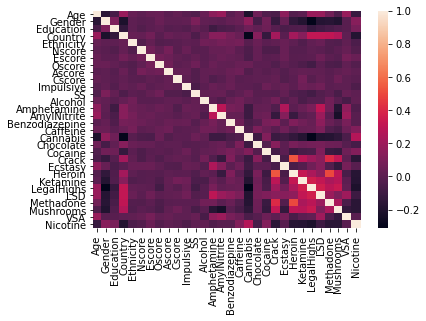

In [40]:
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns,
    yticklabels=correlation.columns
)

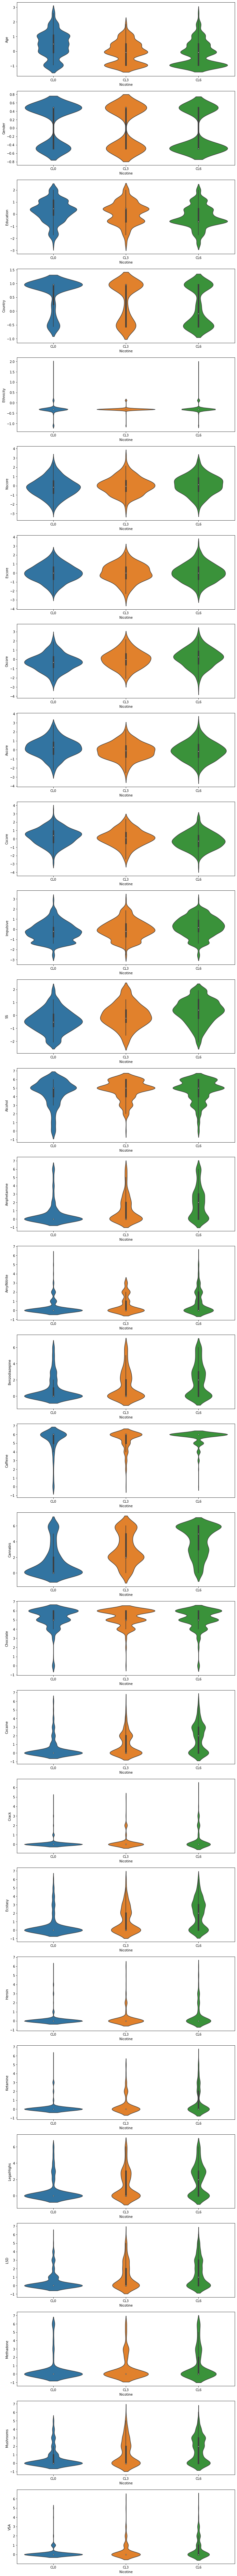

In [41]:
fig = plt.figure(figsize=(12,5* (len(features)+len(drugs) - 1)))
fig.subplots_adjust(hspace=0.2, wspace=0.3)

i = 1
for feature in features:

    ax = fig.add_subplot((len(features)+len(drugs) - 1), 1, i)
    i += 1
    sns.violinplot(x="Nicotine", y=feature, data=train_data_nicotine.sort_values(["Nicotine"]))

for drug in drugs:
    if drug != "Nicotine":
        ax = fig.add_subplot((len(features)+len(drugs) - 1), 1, i)
        i += 1
        sns.violinplot(x="Nicotine", y=drug, data=train_data_nicotine.sort_values(["Nicotine"]))

plt.show()

# Data standarization

In [42]:
scaler = StandardScaler().fit(train_data_nicotine.drop(["Nicotine"], axis=1))

In [43]:
train_data_nicotine_scaled = pd.DataFrame(scaler.transform(train_data_nicotine.drop(["Nicotine"], axis=1)))
train_data_nicotine_scaled["Nicotine"] = train_data_nicotine["Nicotine"].reset_index(drop=True)
train_data_nicotine_scaled.columns = train_data_nicotine.columns
train_data_nicotine_scaled["Usage"] = ["Train"] * len(train_data_nicotine_scaled)

In [44]:
train_data_nicotine_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine,Usage
0,0.515946,-0.993200,-0.059157,0.872898,-0.051575,1.230026,-1.237485,-1.673535,-1.061426,-0.660433,...,-0.185533,-0.353554,-0.449187,-0.748784,-0.011416,-0.49131,-0.792857,0.609749,CL6,Train
1,-0.145828,-0.993200,-0.059157,-1.322269,-0.051575,1.368003,-1.383504,-0.439663,-0.144523,-2.305681,...,1.627189,2.585552,-0.449187,1.466912,-0.695854,0.71659,1.257688,2.734608,CL6,Train
2,0.515946,-0.993200,-0.644462,-0.913752,-0.051575,-0.348191,0.009552,0.740149,0.296466,0.112447,...,0.418708,2.585552,-0.449187,0.912988,2.041899,0.71659,1.941203,0.609749,CL6,Train
3,-0.145828,1.006847,1.237673,0.872898,0.474776,0.310838,-0.950758,-0.571768,2.756054,1.445940,...,-0.789773,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL0,Train
4,-0.145828,-0.993200,-0.644462,-1.322269,-0.051575,0.310838,-0.297035,1.080606,-0.290806,-0.905873,...,0.418708,2.585552,0.396003,0.359064,1.357461,1.92449,1.257688,-0.452680,CL6,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0.515946,-0.993200,-0.059157,-0.147448,-0.051575,0.134518,0.486976,0.308483,-0.594239,0.745014,...,1.022948,0.626148,1.241192,2.574759,0.673022,1.32054,0.574173,0.609749,CL6,Train
1315,-1.148594,-0.993200,1.237673,-1.322269,2.333011,-0.790483,0.486976,1.455071,1.119503,0.112447,...,0.418708,-0.353554,-0.449187,-0.748784,0.673022,-0.49131,0.574173,-0.452680,CL6,Train
1316,-1.148594,-0.993200,-0.059157,0.872898,-0.051575,0.518741,-0.574816,0.900588,-0.007475,0.248147,...,-0.789773,-0.353554,-0.449187,0.912988,-0.695854,-0.49131,-0.792857,-0.452680,CL6,Train
1317,-0.145828,1.006847,2.108037,0.872898,-0.051575,-0.149573,-0.297035,-0.439663,2.235384,1.614265,...,-0.789773,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL0,Train


In [45]:
test_data_nicotine_scaled = pd.DataFrame(scaler.transform(test_data_nicotine.drop(["Nicotine"], axis=1)))
test_data_nicotine_scaled["Nicotine"] = test_data_nicotine["Nicotine"].reset_index(drop=True)
test_data_nicotine_scaled.columns = test_data_nicotine.columns
test_data_nicotine_scaled["Usage"] = ["Test"] * len(test_data_nicotine_scaled)

In [46]:
test_data_nicotine_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine,Usage
0,-1.148594,-0.993200,-0.644462,-1.322269,-0.051575,0.134518,1.474477,1.259279,-1.197697,-0.788961,...,2.835670,3.565254,2.086382,2.574759,2.041899,2.52844,1.941203,-0.452680,CL0,Test
1,-0.145828,1.006847,1.237673,0.872898,-0.051575,1.368003,0.331285,-0.164601,-0.007475,0.403960,...,1.022948,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL6,Test
2,-1.148594,-0.993200,0.485818,0.872898,-4.420800,-0.579718,0.331285,-0.571768,1.290878,-0.905873,...,-0.789773,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL0,Test
3,1.200901,1.006847,0.485818,0.872898,-0.051575,0.732248,-0.297035,-0.571768,-1.061426,-0.152618,...,-0.789773,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL0,Test
4,1.200901,-0.993200,2.108037,0.872898,-0.051575,-0.149573,-0.574816,0.900588,-0.748271,-0.285409,...,1.022948,4.544956,1.241192,1.466912,2.041899,2.52844,1.257688,0.609749,CL6,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.148594,-0.993200,-0.644462,0.872898,-0.051575,-1.436250,0.331285,1.080606,2.041585,0.112447,...,-0.789773,-0.353554,-0.449187,0.359064,-0.695854,-0.49131,-0.792857,-0.452680,CL6,Test
562,-1.148594,-0.993200,-0.644462,-1.322269,-0.051575,1.017197,-2.053251,-0.706272,1.119503,-1.263324,...,1.022948,-0.353554,-0.449187,0.359064,1.357461,3.13239,0.574173,1.672178,CL6,Test
563,-0.145828,-0.993200,-1.298127,0.872898,-0.051575,-1.051329,0.009552,-2.394662,0.446573,-0.017017,...,1.022948,-0.353554,2.931572,2.574759,0.673022,-0.49131,0.574173,2.734608,CL6,Test
564,-1.148594,1.006847,0.485818,0.872898,-0.051575,0.310838,-0.807748,1.080606,0.767767,0.925513,...,0.418708,-0.353554,-0.449187,0.359064,1.357461,1.32054,1.257688,-0.452680,CL6,Test


In [47]:
data_nicotine_scaled = train_data_nicotine_scaled.append(test_data_nicotine_scaled)
data_nicotine_scaled

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,LegalHighs,LSD,Methadone,Mushrooms,VSA,Nicotine,Usage
0,0.515946,-0.993200,-0.059157,0.872898,-0.051575,1.230026,-1.237485,-1.673535,-1.061426,-0.660433,...,-0.185533,-0.353554,-0.449187,-0.748784,-0.011416,-0.49131,-0.792857,0.609749,CL6,Train
1,-0.145828,-0.993200,-0.059157,-1.322269,-0.051575,1.368003,-1.383504,-0.439663,-0.144523,-2.305681,...,1.627189,2.585552,-0.449187,1.466912,-0.695854,0.71659,1.257688,2.734608,CL6,Train
2,0.515946,-0.993200,-0.644462,-0.913752,-0.051575,-0.348191,0.009552,0.740149,0.296466,0.112447,...,0.418708,2.585552,-0.449187,0.912988,2.041899,0.71659,1.941203,0.609749,CL6,Train
3,-0.145828,1.006847,1.237673,0.872898,0.474776,0.310838,-0.950758,-0.571768,2.756054,1.445940,...,-0.789773,-0.353554,-0.449187,-0.748784,-0.695854,-0.49131,-0.792857,-0.452680,CL0,Train
4,-0.145828,-0.993200,-0.644462,-1.322269,-0.051575,0.310838,-0.297035,1.080606,-0.290806,-0.905873,...,0.418708,2.585552,0.396003,0.359064,1.357461,1.92449,1.257688,-0.452680,CL6,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.148594,-0.993200,-0.644462,0.872898,-0.051575,-1.436250,0.331285,1.080606,2.041585,0.112447,...,-0.789773,-0.353554,-0.449187,0.359064,-0.695854,-0.49131,-0.792857,-0.452680,CL6,Test
562,-1.148594,-0.993200,-0.644462,-1.322269,-0.051575,1.017197,-2.053251,-0.706272,1.119503,-1.263324,...,1.022948,-0.353554,-0.449187,0.359064,1.357461,3.13239,0.574173,1.672178,CL6,Test
563,-0.145828,-0.993200,-1.298127,0.872898,-0.051575,-1.051329,0.009552,-2.394662,0.446573,-0.017017,...,1.022948,-0.353554,2.931572,2.574759,0.673022,-0.49131,0.574173,2.734608,CL6,Test
564,-1.148594,1.006847,0.485818,0.872898,-0.051575,0.310838,-0.807748,1.080606,0.767767,0.925513,...,0.418708,-0.353554,-0.449187,0.359064,1.357461,1.32054,1.257688,-0.452680,CL6,Test


In [48]:
data_nicotine_scaled.reset_index(drop=True).to_csv("nicotine_preprocessed.csv")